## Kriminal glede na organizirano združbo

Pridobivanje podatkov za obravnavo

In [16]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [17]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [18]:
dataframes_copy = copy(dataframes)
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta
full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [19]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

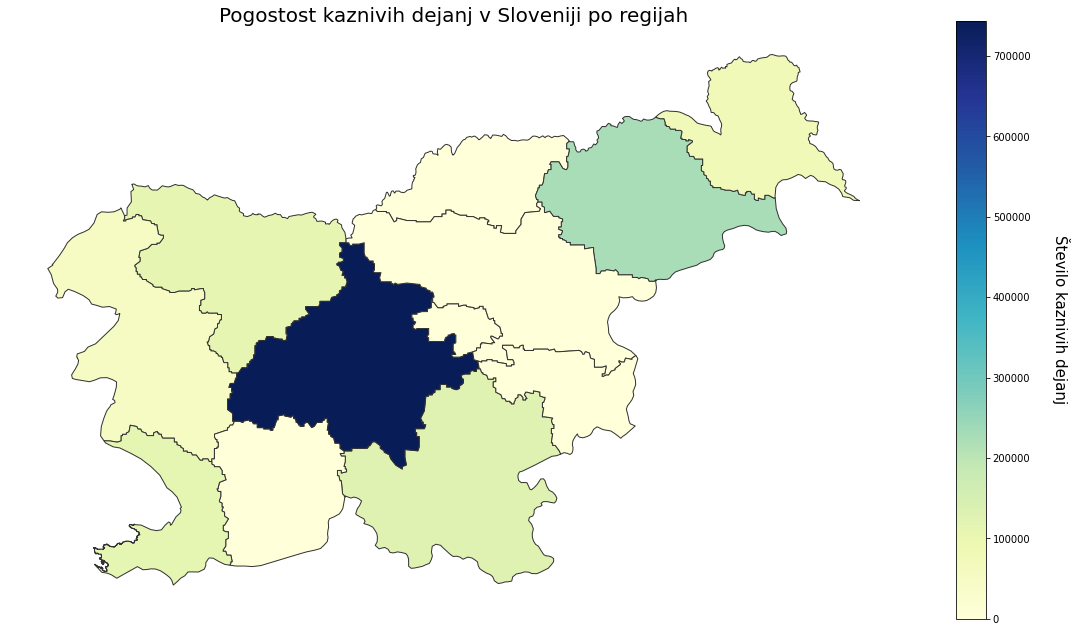

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

seznam_PU = full_KD.PUStoritveKD.value_counts()

stevilo = [seznam_PU["PU KRANJ"], seznam_PU["PU NOVA GORICA"], seznam_PU["PU NOVO MESTO"], 0, 0, seznam_PU["PU KOPER"], seznam_PU["PU LJUBLJANA"]+seznam_PU["GPU"]
            , 0, seznam_PU["PU MARIBOR"], 0, seznam_PU["PU MURSKA SOBOTA"], 0]


slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kaznivih dejanj v Sloveniji po regijah', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kaznivih dejanj', fontsize=15, rotation=270, labelpad=40)

### Priprava podatkov za prikaz kriminala glede na organizirano združbo

Grafa glede na vrednost organizirane zbružbe sta ločena (graf za DAm graf za NE), saj je le tako mogoč prikaz kriminala glede na ti dve vrednost.

In [21]:
celota = full_KD.groupby("PUStoritveKD", sort=False).OrganiziranaZdruzba.value_counts()
celota_popravljeno = celota.drop(['DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE', 'NI PODATKA'])

stevilo_DA = [celota_popravljeno[11], celota_popravljeno[13], celota_popravljeno[7], 0, 0, celota_popravljeno[9], celota_popravljeno[3]+celota_popravljeno[17]
            , 0, celota_popravljeno[5], celota_popravljeno[1], celota_popravljeno[15], 0]

stevilo_NE =  [celota_popravljeno[10], celota_popravljeno[12], celota_popravljeno[6], 0, 0, celota_popravljeno[8], celota_popravljeno[2]+celota_popravljeno[16]
            , 0, celota_popravljeno[4], celota_popravljeno[0], celota_popravljeno[14], 0]


Prikaz grafa Slovenije za vrednost DA

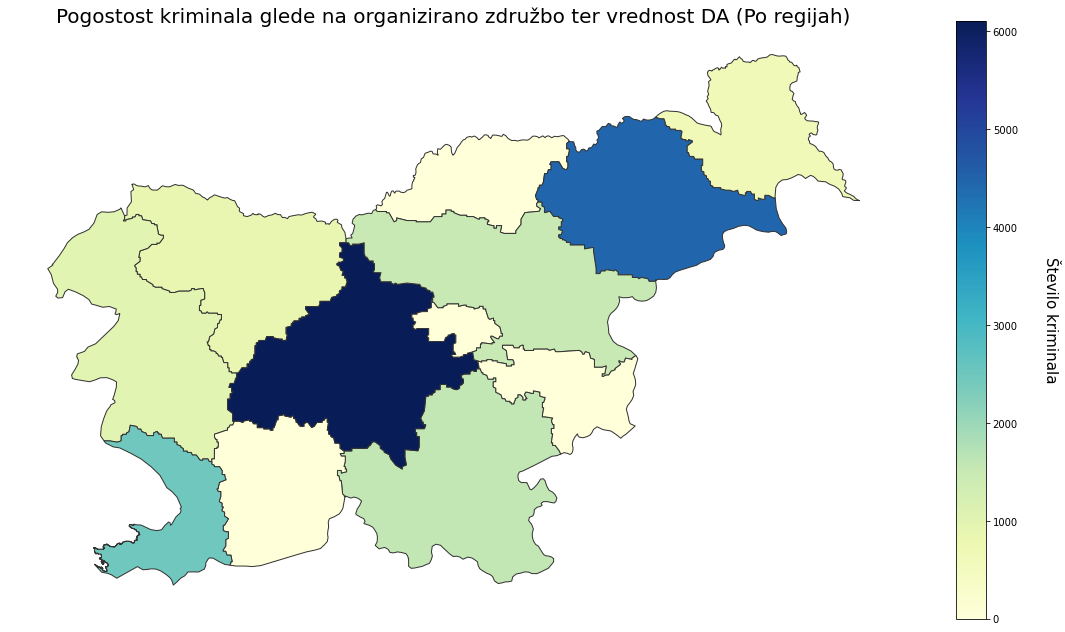

In [22]:
slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo_DA
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kriminala glede na organizirano združbo ter vrednost DA (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo_DA)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

Prikaz grafa Slovenije glede na vrednost NE

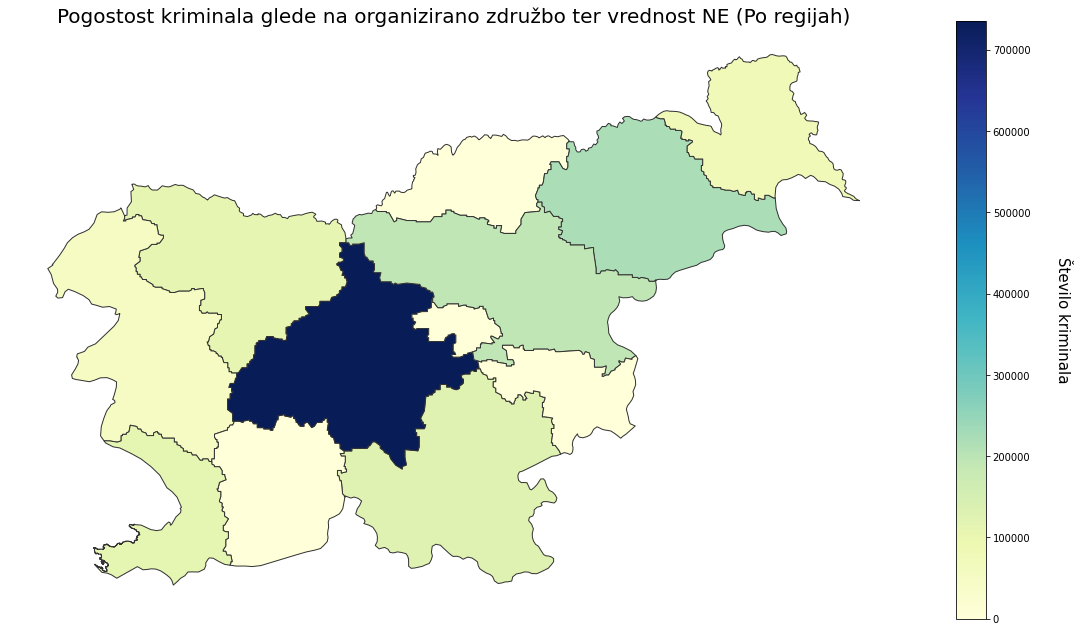

In [23]:
slovenia['stevilo'] = stevilo_NE
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kriminala glede na organizirano združbo ter vrednost NE (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo_NE)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

**ODGOVOR:** <br>Kot lahko opazimo iz prvega grafa lahko vidimo, da je na največ kriminala v Sloveniji, ki poteka v neki organizirani združbi, v osrednjeslovenski regiji, najmanj pa v Murski Soboti.
<br>Iz drugega grafa pa lahko opazimo, da je prav tako največ kriminala, ki ne poteka v organiziranih združbah, v osrednjeslovenski regiji, najmanj pa v Novi Gorici.

***OPOMNIK:*** Na grafu imamo vedno 4 regije, ki imajo vrednost 0, saj teh vrednosti za te regije, v naši tabeli, nismo imeli. <br>Regije za katere nismo imeli podatka v tabeli:
* Primorsko - notranjska regija,
* Zasavska regija,
* Posavska regija ter
* Koroška regija

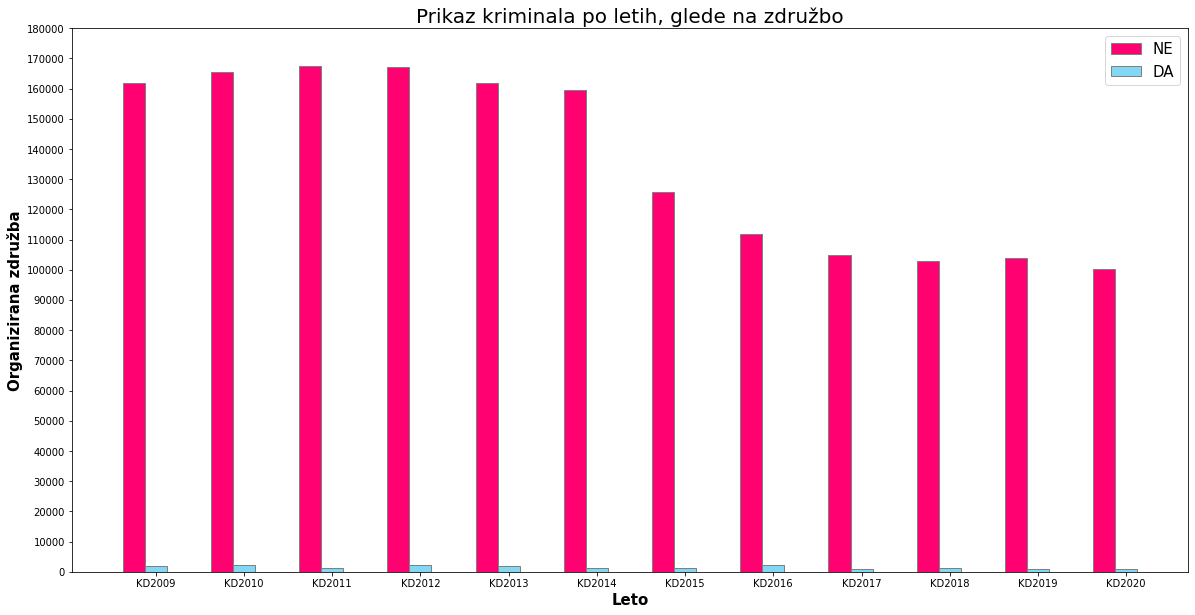

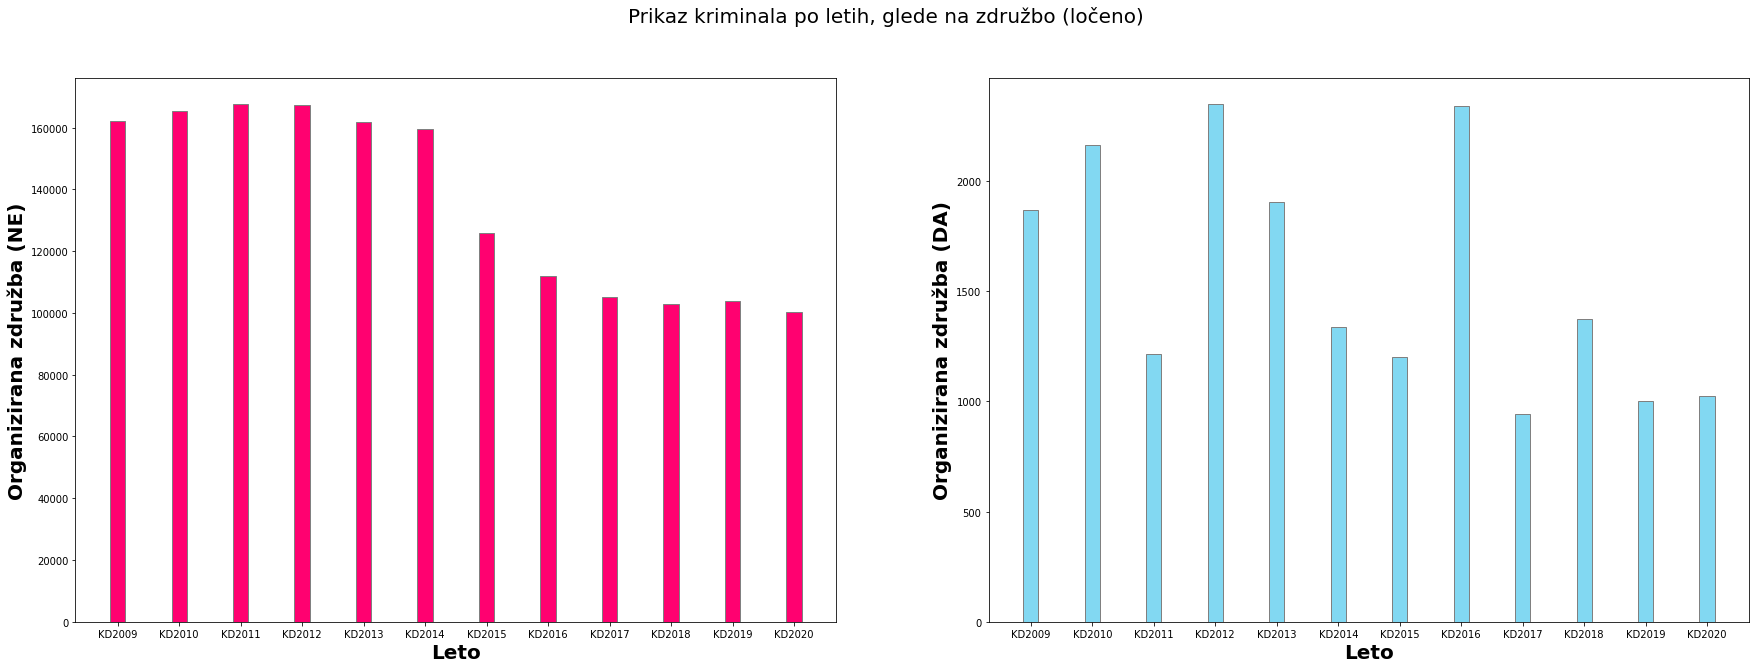

In [24]:
import numpy as np

podatka = {}
podatki_NE = []
podatki_DA = []
ind = []

df = {k:v for k,v in dataframes.items()}

for key, value in df.items():
    df1 = copy(df[key])
    podatki = df1["OrganiziranaZdruzba"].value_counts()
    podatki_NE.append(podatki.values.tolist()[0])
    podatki_DA.append(podatki.values.tolist()[1])
    ind.append(key)

#Prikaz kriminala glede na združbo, lažje opažanje razlike
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))
br1 = np.arange(len(podatki_NE))
br2 = [x + barWidth for x in br1]

plt.title("Prikaz kriminala po letih, glede na združbo", fontsize=20)
plt.bar(br1, podatki_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
plt.bar(br2, podatki_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA')
plt.xlabel('Leto', fontweight ='bold', fontsize = 15)
plt.ylabel('Organizirana združba', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(podatki_NE))], ind)
plt.yticks(np.arange(0,190000, step=10000))
plt.legend(fontsize=15)
plt.show()

#Prikaz kriminala glede na združbo ločeno, lažji prikaz števila
fg, (pl1, pl2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4,4]})
fg.set_size_inches(30,10)
fg.suptitle("Prikaz kriminala po letih, glede na združbo (ločeno)", fontsize=20)

pl1.bar(ind, podatki_NE ,color = '#FF0170', width = barWidth, edgecolor ='grey', label ='NE')
pl1.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl1.set_ylabel('Organizirana združba (NE)', fontweight ='bold', fontsize = 20)

pl2.bar(ind, podatki_DA, color = '#82D8F2', width = barWidth, edgecolor ='grey', label ='DA')
pl2.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl2.set_ylabel('Organizirana združba (DA)', fontweight ='bold', fontsize = 20)

plt.show()


**UGOTOVITVE:** Iz grafov je kar najbolje razvidno, da v Sloveniji v vseh teh letih ni prišlo do večjega števila kriminala v organiziranih združbah, kar pomeni, da so skoraj vsi kriminalci, posamezniki. Razlika je vidna predvsem v 1. grafu, ki prikazuje obe vrednosti skupaj. Nato sta pod njim še razčlenjeni verziji za lažjo berljivost številk.

V naslednjem grafu bomo prikazali udeležence združn in ne združb glede na njihovo starost (je mladoleten ali ne mladoletna). Iz celega seznama imamo naslednje starostne skupine:
* PRAVNA OSEBA
* 34-44
* 24-34  
* 44-54
* 54-64
* 18-24
* NAD 64
* 16-18
* 41821
* 14-16
* 00-07
* NI PODATKA
* NI POJAVA<br><br>
Iz seznama smo odstranili vrednosti o PRAVNIH OSEBAH, ker ta vrednost predstavlja gospodarske družbe, zavode, društva, organe in druge organizacije, vrednost 41821, saj ta podatek ne predstavlja natanče starosti in nato še vrednosti NI PODATKA ter NI POJAVA. Ostale vrednosti bomo grupirali po starosti in izrisali grafe glede na pripadnost organizirani združbi.

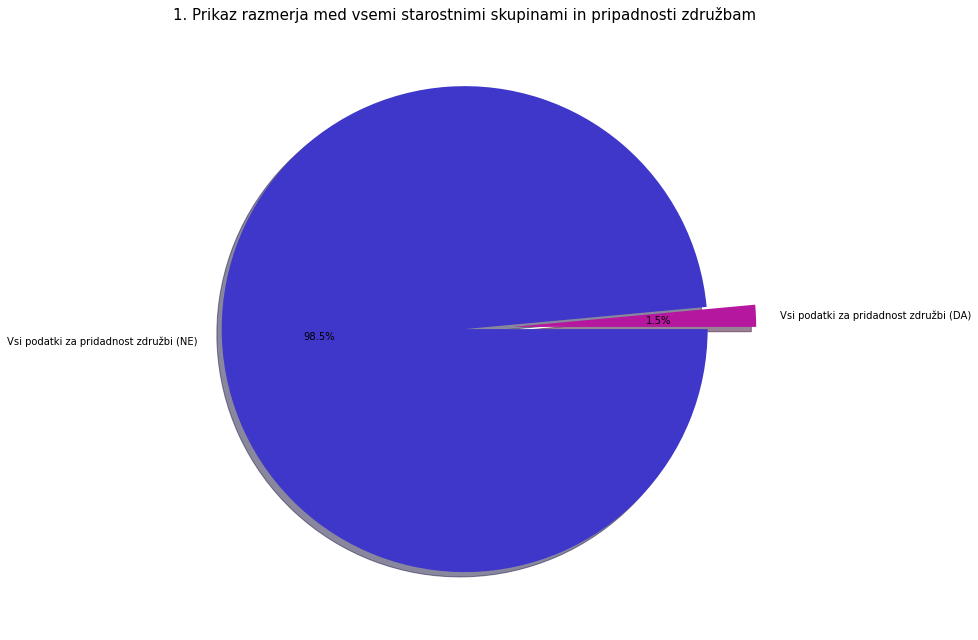

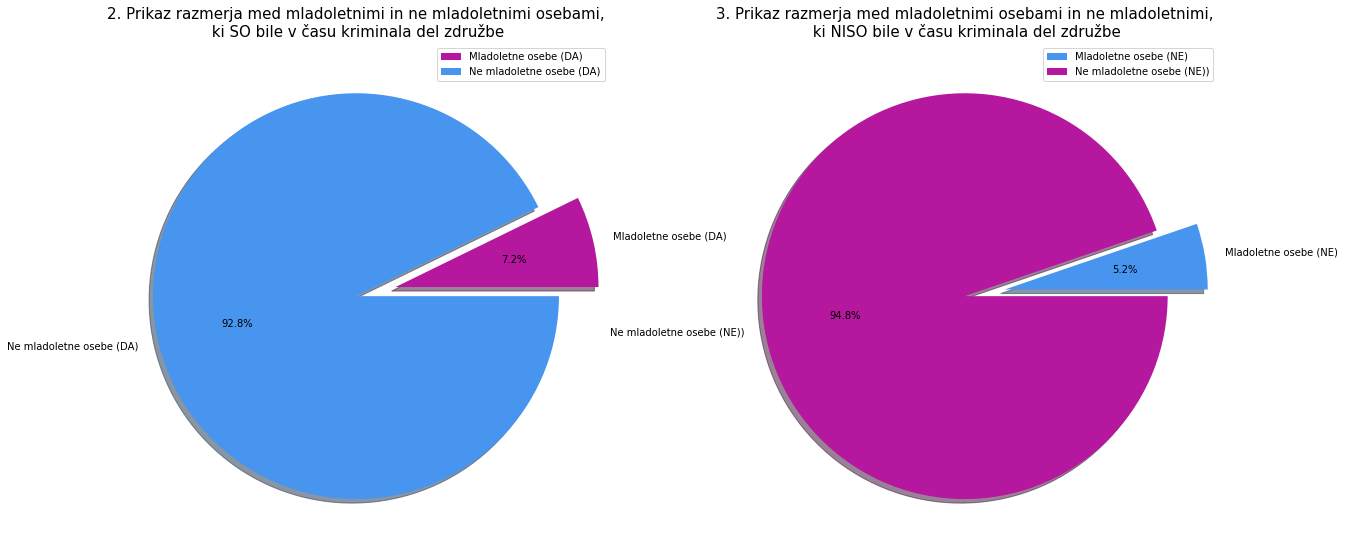

In [41]:
neki = full_KD.groupby("StarostniRazred", sort=False).OrganiziranaZdruzba.value_counts()

je_mladoleten = ((full_KD["StarostniRazred"] == "00-07") | (full_KD["StarostniRazred"] == "41821") | 
                    (full_KD["StarostniRazred"] == "14-16") | (full_KD["StarostniRazred"] == "16-18"))

neki.pop('NI PODATKA')
neki.pop('NI POJAVA')
neki.pop('PRAVNA OSEBA')
neki.pop('41821')

neki = neki.sort_index()
podatki_DA = []
podatki_NE = []

for i in neki.keys():
    if i[1] == 'DA':
        podatki_DA.append(neki[i])
    else:
        podatki_NE.append(neki[i])

mladoleten_DA = sum(podatki_DA[:3])
mladoleten_NE = sum(podatki_NE[:3])
ne_mladoleten_DA = sum(podatki_DA[3:])
ne_mladoleten_NE = sum(podatki_NE[3:])

pod_DA = sum(podatki_DA)
pod_NE = sum(podatki_NE)

list1 = np.array([mladoleten_DA, ne_mladoleten_DA])
list2 = np.array([mladoleten_NE, ne_mladoleten_NE])
list3 = np.array([pod_DA, pod_NE])


mylabels1 = ["Mladoletne osebe (DA)", "Ne mladoletne osebe (DA)"]
mylabels2 = ["Mladoletne osebe (NE)", "Ne mladoletne osebe (NE))"]
mylabels3 = ["Vsi podatki za pridadnost združbi (DA)", "Vsi podatki za pridadnost združbi (NE)"]
myexplode = [0.2, 0]

plt.figure(figsize=(14,9), tight_layout = True)
plt.title("1. Prikaz razmerja med vsemi starostnimi skupinami in pripadnosti združbam", fontsize= 15)
plt.pie(list3, labels = mylabels3, explode = myexplode, shadow = True, autopct='%1.1f%%', colors=[color_pallete[2], color_pallete[7]])

fig, (pl1, pl2) = plt.subplots(1,2, figsize =(20, 15))

pl1.title.set_text("2. Prikaz razmerja med mladoletnimi in ne mladoletnimi osebami,\n ki SO bile v času kriminala del združbe")
pl1.title.set_fontsize(15)
pl1.pie(list1, labels = mylabels1, explode = myexplode, shadow = True, autopct='%1.1f%%',colors=[color_pallete[2], color_pallete[9]])
pl1.legend(loc='upper right')

pl2.title.set_text("3. Prikaz razmerja med mladoletnimi osebami in ne mladoletnimi,\n ki NISO bile v času kriminala del združbe")
pl2.title.set_fontsize(15)
pl2.pie(list2, labels = mylabels2, explode = myexplode, shadow = True, autopct='%1.1f%%', colors=[color_pallete[9], color_pallete[2]])
pl2.legend(loc='upper right')

plt.show() 

**ODGOVOR:**<br>
***1. GRAF:*** Na tem grafu sta prikazana razmerja med osebami vseh starosti in pripadnosti organiziranim združbam. Kot lahko opazimo je med vrednostima DA in NE zelo opazna razlika. To pomeni, da je skozi leta v Sloveniji bilo zelo malo kriminala, ki je vseboval neko organizirano združbo.<br>
***2. GRAF:*** Iz drugega grafa lahko vidimo, da je razmerje med mladoletnimi in ne mladoletnimi osebami, ki so bile vpletene v organizirano združbo, kar veliko, kar nam pove, da so osebe mlajše od 18 let, manj vpletene v organiziran kriminal. <br>
***3. GRAF:*** Iz tretjega grafa lahko razberemo podobno kot iz prvega, razlika je samo v tem, da pri tem grafu prikazujemo mladoletne in ne mladoletne osebe, ki niso bile del organiziranega kriminala.<br>

In [80]:
"""celota = full_KD.groupby(["LetoStoritve", "PUStoritveKD"], sort=False).OrganiziranaZdruzba.value_counts()

leta = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
celota_popravljeno = celota.drop(['DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE', 'NI PODATKA'])
 
for i in celota.keys():
    
    if i[0] in leta:
        print(i, celota[i])
    else:
        continue
#c.loc[(c['LetoStoritve'] == '2009')]"""


'celota = full_KD.groupby(["LetoStoritve", "PUStoritveKD"], sort=False).OrganiziranaZdruzba.value_counts()\n\nleta = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]\ncelota_popravljeno = celota.drop([\'DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE\', \'NI PODATKA\'])\n \nfor i in celota.keys():\n    \n    if i[0] in leta:\n        print(i, celota[i])\n    else:\n        continue\n#c.loc[(c[\'LetoStoritve\'] == \'2009\')]'